In [14]:
import pandas as pd
from matplotlib import pyplot
from sklearn import preprocessing
import seaborn as sns
import datetime as dt
from statsmodels.tsa.stattools import adfuller
import numpy as np

pyplot.rcParams["figure.figsize"] = (16,9)

In [3]:
start_date = '2016-01-04T00'
end_date = '2020-03-02T00'

#### Import Price Data

In [4]:
price_data = pd.read_csv("../price data/iDhP/candles_btc-usd_1h.csv")
new_price_data = price_data.copy()
new_price_data['timestamp'] = [pd.Timestamp(t) for t in price_data['timestamp']]
new_price_data['from'] = [pd.Timestamp(t) for t in price_data['from']]
new_price_data['to'] = [pd.Timestamp(t) for t in price_data['to']]
new_price_data.head()

,timestamp,exchange,market,base,quote,from,to,open,close,high,low,volume_base,volume_quote
0,2011-01-01 00:00:00,cccagg,btc-usd,btc,usd,2010-12-31 23:00:00,2011-01-01 00:00:00,0.29200,0.29200,0.3,0.292,117.551667,35.08125
1,2011-01-01 01:00:00,cccagg,btc-usd,btc,usd,2011-01-01 00:00:00,2011-01-01 01:00:00,0.29997,0.29997,0.3,0.289,223.004583,66.02750
2,2011-01-01 02:00:00,cccagg,btc-usd,btc,usd,2011-01-01 01:00:00,2011-01-01 02:00:00,0.29997,0.29997,0.3,0.289,223.004583,66.02750
3,2011-01-01 03:00:00,cccagg,btc-usd,btc,usd,2011-01-01 02:00:00,2011-01-01 03:00:00,0.29997,0.29997,0.3,0.289,223.004583,66.02750
4,2011-01-01 04:00:00,cccagg,btc-usd,btc,usd,2011-01-01 03:00:00,2011-01-01 04:00:00,0.29997,0.29997,0.3,0.289,223.004583,66.02750


#### Import Wikipedia User Activity Data

In [5]:
wiki_data = pd.read_csv("../data connectors/wikipedia/data.csv")
new_wiki_data = wiki_data[wiki_data['article'] == 'Bitcoin'].copy()
new_wiki_data.drop(columns=wiki_data.columns.to_list()[:1],inplace=True)
new_wiki_data['timestamp'] = new_wiki_data['timestamp'].astype('str')
new_wiki_data['timestamp'] = [pd.Timestamp(year=int(t[:4]),month=int(t[4:6]),day=int(t[6:8]),hour=0) for t in new_wiki_data['timestamp'].to_list()]
new_wiki_data.head()

,article,timestamp,views
0,Bitcoin,2015-07-01,13137
1,Bitcoin,2015-07-02,9938
2,Bitcoin,2015-07-03,8498
3,Bitcoin,2015-07-04,9113
4,Bitcoin,2015-07-05,8908


### Plotting data

In [10]:
new_price_data.index = new_price_data['timestamp']
new_wiki_data.index = new_wiki_data['timestamp']

In [11]:
new_price_data = new_price_data[start_date:end_date].copy()
new_wiki_data = new_wiki_data[start_date:end_date].copy()

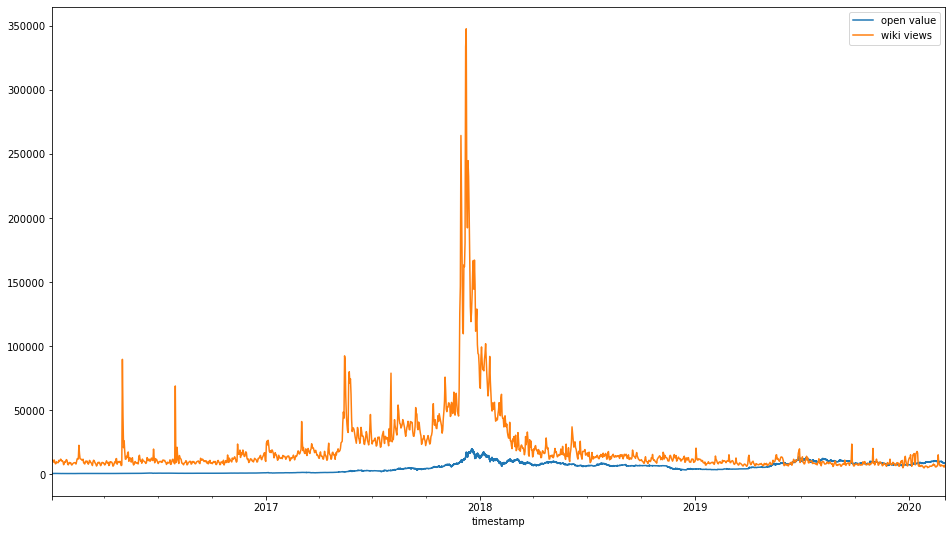

In [12]:
new_price_data['open'].plot(label='open value')
new_wiki_data['views'].plot(label='wiki views')
#new_trends_data['normalized_trends'].plot(label='google trends')

pyplot.legend()
pyplot.show()

### Testing the Stationarity of the Time Series

source: https://machinelearningmastery.com/time-series-data-stationary-python/

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [15]:
ts = np.array(new_price_data['open'])
ts = ts[~np.isnan(ts)]

result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.660167
p-value: 0.451744
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [16]:
ts = np.array(new_wiki_data['views'])
ts = ts[~np.isnan(ts)]

result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.050031
p-value: 0.030479
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


p value of the test result of Price data is bigger than 0.05, it is non-stationary.

p value of the test result of Wiki page-views data is smaller than 0.05 but bigger than 0.01. It is better to take it as non-stationary too.

### Convert Non-Stationary Time Series to Stationary

In [17]:
ts = np.array(new_price_data['open'].diff())
ts = ts[~np.isnan(ts)]

result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -26.356347
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [18]:
ts = np.array(new_wiki_data['views'].diff())
ts = ts[~np.isnan(ts)]

result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.622834
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


both p values are way more smaller than 0.05 -> series are stationary (with difference operation)

### Windowed Time Lagged Cross Correlation (page_views<->price)

In [33]:
corr_start = '2018-01-01'
corr_finish = '2020-01-01'

In [34]:
price_d = new_price_data[corr_start:corr_finish].copy()
wiki_d = new_wiki_data[corr_start:corr_finish].copy()

### Aggregation of the price data to daily level

In [35]:
price_d['day'] = [ts.strftime('%Y-%m-%d') for ts in price_d['timestamp'].to_list()]
price_d = price_d.groupby(by=['day']).sum()
price_d.index = [pd.Timestamp(ts) for ts in price_d.index.to_list()]
price_d.head()

,open,close,high,low,volume_base,volume_quote,normalized_open
2018-01-01,322931.98,322548.12,325661.49,320000.24,77909.5200,1.051662e+09,16.180389
2018-01-02,330676.00,331994.06,335336.23,328501.77,135733.9800,1.923092e+09,16.579024
2018-01-03,359064.56,359086.04,362106.73,356473.63,106549.4700,1.603038e+09,18.040369
2018-01-04,355078.84,355277.20,357886.98,352552.57,112065.7671,1.672641e+09,17.835198
2018-01-05,377065.87,378995.92,381018.54,374959.58,138746.8500,2.221396e+09,18.967014


### Difference Operation

In [36]:
price_d['diff_open'] = price_d['open'].diff()
wiki_d['diff_views'] = wiki_d['views'].diff()

### Normalization

In [37]:
min_max_scaler = preprocessing.MinMaxScaler()

price_val = price_d['diff_open'].values
normalized_price_val = min_max_scaler.fit_transform(price_val.reshape(price_val.shape[0],1))
price_d['normalized_diff_open'] = normalized_price_val.reshape(-1,1)

wiki_view = wiki_d['diff_views'].values
normalized_wiki_view = min_max_scaler.fit_transform(wiki_view.reshape(wiki_view.shape[0],1))
wiki_d['normalized_diff_views'] = normalized_wiki_view.reshape(-1,1)

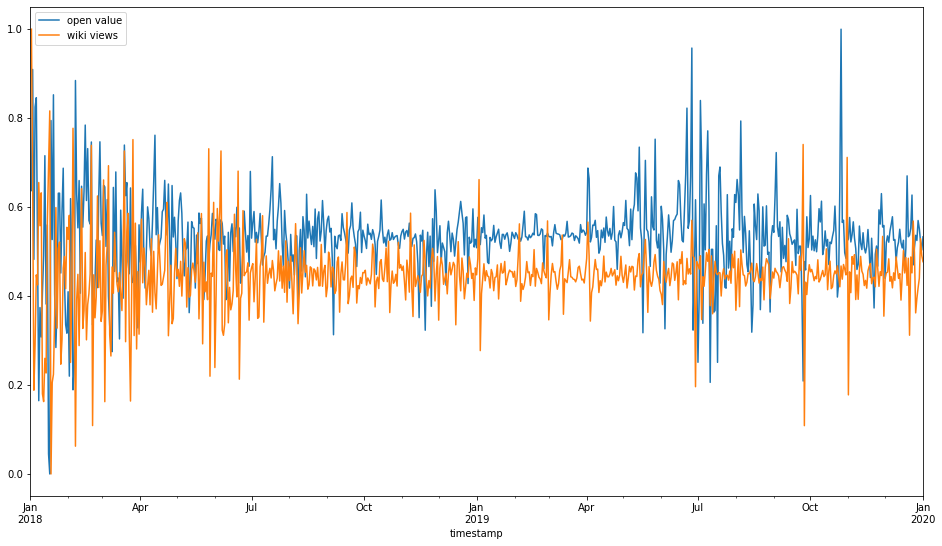

In [39]:
price_d['normalized_diff_open'].plot(label='open value')
wiki_d['normalized_diff_views'].plot(label='wiki views')

pyplot.legend()
pyplot.show()

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


[Text(123.0, 0.5, 'Weeks'),
 Text(0.5, 60.0, 'Offset'),
 Text(0.5, 1.0, 'Rolling Windowed(Weekly) Time Lagged Cross Correlation')]

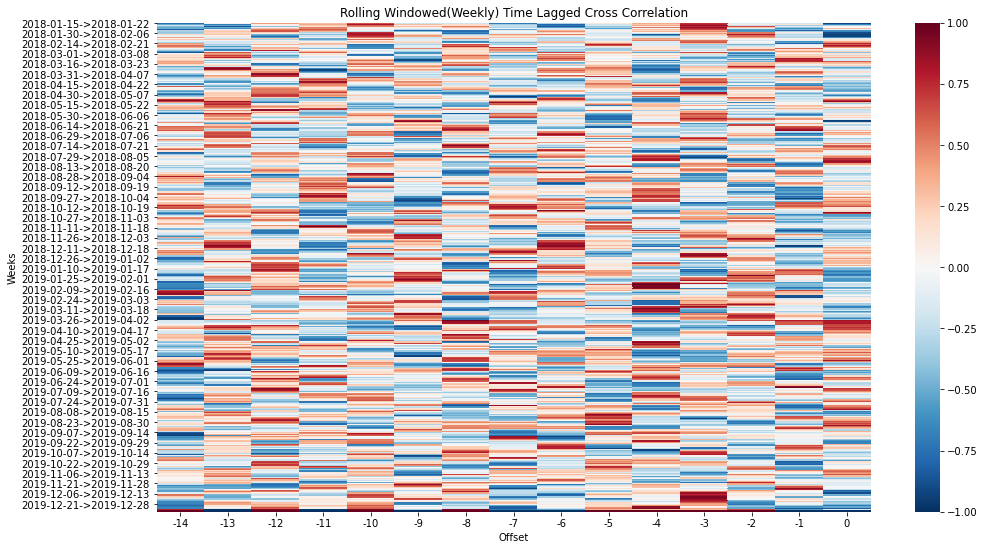

In [38]:
corrs = pd.DataFrame()

offset = 14 # days
ts_len = 7 # days
#epoch_len = 24 #1 day = 24 hours

day_index = list()
for t in range(price_d.shape[0]-offset):
    ts_1 = pd.Series(price_d.iloc[t+offset:t+offset+ts_len]['normalized_diff_open'].values)
    day = price_d.iloc[t+offset:t+offset+ts_len].index.to_list()[0]
    day2 = day+dt.timedelta(days=7)
    day_index.append(day.strftime('%Y-%m-%d')+'->'+day2.strftime('%Y-%m-%d'))
    
    corrs_ = list()
    for o in range(offset+1):
        ts_2 = pd.Series(wiki_d.iloc[t+o:t+o+ts_len]['normalized_diff_views'].values)
        
        corr = ts_1.corr(ts_2)
        corrs_.append(corr)
        
    corrs = corrs.append(pd.DataFrame([corrs_],columns=[str(i-offset) for i in range(offset+1)]),ignore_index=True)
corrs.index = day_index
f,ax = pyplot.subplots()
sns.heatmap(corrs,cmap='RdBu_r')
ax.set(title='Rolling Windowed(Weekly) Time Lagged Cross Correlation',xlabel='Offset',ylabel='Weeks')

### 2nd difference

In [42]:
price_d['normalized_2nd_diff_open'] = price_d['normalized_diff_open'].diff()
wiki_d['normalized_2nd_diff_views'] = wiki_d['normalized_diff_views'].diff()

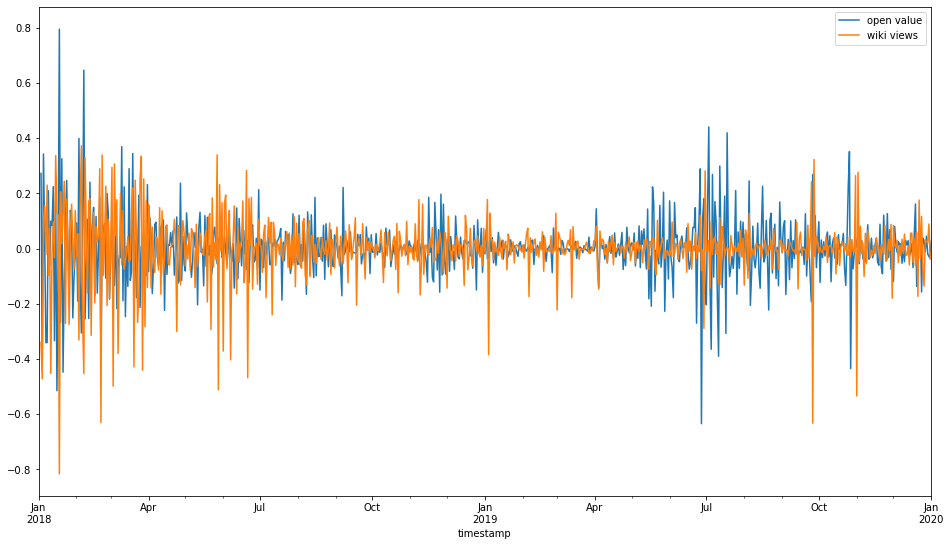

In [43]:
price_d['normalized_2nd_diff_open'].plot(label='open value')
wiki_d['normalized_2nd_diff_views'].plot(label='wiki views')

pyplot.legend()
pyplot.show()

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


[Text(123.0, 0.5, 'Weeks'),
 Text(0.5, 60.0, 'Offset'),
 Text(0.5, 1.0, 'Rolling Windowed(Weekly) Time Lagged Cross Correlation')]

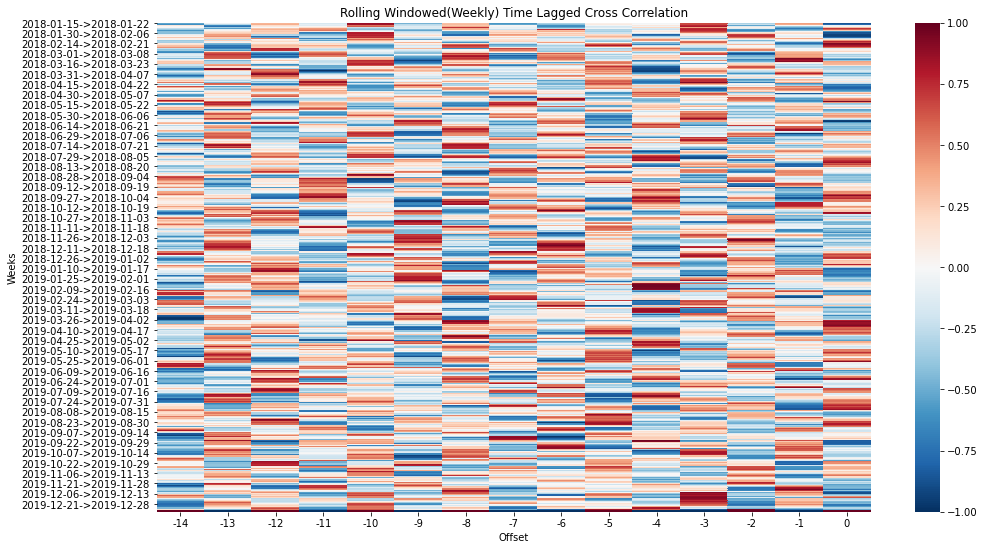

In [44]:
corrs = pd.DataFrame()

offset = 14 # days
ts_len = 7 # days
#epoch_len = 24 #1 day = 24 hours

day_index = list()
for t in range(price_d.shape[0]-offset):
    ts_1 = pd.Series(price_d.iloc[t+offset:t+offset+ts_len]['normalized_2nd_diff_open'].values)
    day = price_d.iloc[t+offset:t+offset+ts_len].index.to_list()[0]
    day2 = day+dt.timedelta(days=7)
    day_index.append(day.strftime('%Y-%m-%d')+'->'+day2.strftime('%Y-%m-%d'))
    
    corrs_ = list()
    for o in range(offset+1):
        ts_2 = pd.Series(wiki_d.iloc[t+o:t+o+ts_len]['normalized_2nd_diff_views'].values)
        
        corr = ts_1.corr(ts_2)
        corrs_.append(corr)
        
    corrs = corrs.append(pd.DataFrame([corrs_],columns=[str(i-offset) for i in range(offset+1)]),ignore_index=True)
corrs.index = day_index
f,ax = pyplot.subplots()
sns.heatmap(corrs,cmap='RdBu_r')
ax.set(title='Rolling Windowed(Weekly) Time Lagged Cross Correlation',xlabel='Offset',ylabel='Weeks')

In [ ]:
#offset freq dist where freq of corrs bigger than threshold
threshold = 0.8
offset_freq_dist = list()
for c in corrs.columns:
    offset_freq_dist += [c for _ in range(corrs[corrs[c] > threshold].shape[0])]

sns.distplot(offset_freq_dist)